# Classifier Metrics Worksheet

In [1]:
import pandas as pd
import numpy as np

/var/folders/z9/_7_397gj4ksf314n84j8mhcr0000gn/T/ipykernel_64166/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Class Labels Toy Dataset

In [8]:
def make_class_labels(n:int) -> pd.DataFrame:
    """make a toy dataset of classifier predictions
    returns a df with columns y_true and y_pred"""
    y_true = np.random.randint(2, size=n)
    y_pred = np.random.randint(2, size=n)
    pct = int(round(.2 * n, 0))
    y_pred[:pct] = y_true[:pct]
    return pd.DataFrame({"y_true": y_true, "y_pred": y_pred})

In [9]:
df = make_class_labels(100)
df.head()

## Classifier Metrics
Metrics that use class labels (NOT probabilities)

In [14]:
# confusion matrix
ct = pd.crosstab(df["y_true"], df["y_pred"])
ct

y_pred,0,1
y_true,,
0,26,26
1,20,28


In [ ]:
# get the results below by parsing the dataframe e.g. tp = ct.iloc[1,1]

# true positive
tp =

# false positive
fp = 

# true negative
tn = 

# false negative
fn = 

In [ ]:
# precision
# write the definition
prec = 

In [12]:
# recall
# write the definition
rec = 

SyntaxError: invalid syntax (3817097457.py, line 2)

In [ ]:
# f1-score
f1 = 

In [ ]:
# accuracy
acc = 

### Putting it all together into a Function

In [ ]:
# write a function that calculates all of these metrics given a df with cols y_true, y_pred
def classifier_metrics(df: pd.DataFrame) -> None:
    # TODO - your code here
    print(f"precision: {prec}")
    print(f"recall: {rec}")
    print(f"f1: {f1}")
    print(f"accuracy: {acc}")

# Class Probabilities

In [40]:
def make_class_prob(n = 10, p = .7) -> pd.DataFrame:
    """make a toy dataset of y_true labels and predicted class probabilities"""
    r = np.random.normal(0, .25, n) # randomness
    d = np.random.rand(n) # probability used to predict the true class
    
    y_true =np.where(d >= p, 1, 0) # class labels
    y_prob = (d + r).clip(.01, .99) # simulate a model by taking probability + random error as predicted prob
    return pd.DataFrame({"y_true": y_true, "y_prob": y_prob})


In [41]:
x = make_class_prob(100)

In [42]:
x.head()

,y_true,y_prob
0,1,0.966966
1,0,0.340319
2,0,0.159384
3,0,0.224972
4,1,0.679301


In [ ]:
# make class labels with a .5 probability threshold
# calculate the metrics above

### Calculate ROC AUC from scratch

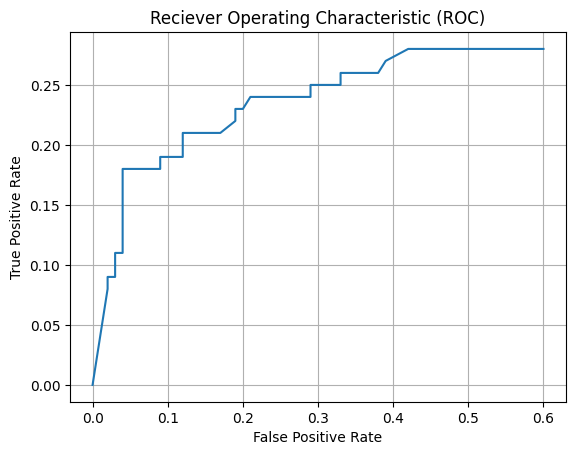

In [81]:
# this shows if you understand how to calculate ROC

# first we set a threshold e.g. .9
# then we calculate the class label from the threshold (i.e. when the probability > threshold)
# then we calculate true positive RATE and false positive RATE
# then we de-increment the threshold and go again

pairs = []
# thresh = .9
for thresh in range(99, 1, -1):
    
    classes = np.where(x["y_prob"] > thresh/100., 1, 0)

    # true positive rate
    tpr = ((classes == 1) & (x["y_true"] == 1)).sum() / len(x)
    # false positive rate
    fpr = ((classes == 1) & (x["y_true"] == 0)).sum() / len(x)
    pairs.append((tpr, fpr))

# create the receiver operating characteristic
roc = pd.DataFrame(pairs, columns=["tpr", "fpr"])

# make a plot of the ROC
roc.plot(kind="line", x="fpr", y="tpr", grid=True,
         title="Reciever Operating Characteristic (ROC)", legend=False, 
         ylabel="True Positive Rate", xlabel="False Positive Rate"
);

In [77]:
np.trapz(roc["tpr"], roc["fpr"])

0.14045